In [1]:
# zadanie 2
# element nie moze byc przy scianie 
# zrobic kontener na mapie i wepchnac wszystkie kule do kontenera
# wpychamy tylko jedna kule do kontenera
# mozemy pchac tylko jedna kule 
# element nie moze pojawic sie na krawedzi
# nie dopchnac kuli do krawedzi bo wtedy nie wygramy
# jak cztery kule tworza kwadrat wtedy nie da sie wygrac
# zrob tak aby kule nie spalnowaly sie na tym samym miejscu

In [2]:
# Task 2
# the item can't be against the wall 
# make a container on the map and push all the balls into the container
# we can only push one ball into the container at the same time
# we can only push one ball 
# the item can't appear on the edge
# don't push the ball to the edge or you won't win
# if four balls form a square, you can't win
# make it so the balls don't burn in the same place

useful links:
-    https://mathsathome.com/calculating-bearings/#:~:text=If%20given%20the%20bearing%20from,from%20A%20is%20050%C2%B0 

Loose notes:
- In mathematics, a **bearing** is defined as an angle measured clockwise from north.
- The **true bearing** is the angle measured clockwise from north. The true bearing is often referred to simply as the bearing.
- The **relative bearing** is the angle between the direction of travel and some other direction. This angle is measured 
- A **quadrant bearing** is the angle made between a north or south direction and an east or west direction. North or south is written first, then the angle, then east or west. For example, a quadrant bearing of S30°W means to start facing south then make a 30° angle towards the west.clockwise from the current direction.
    - #### math.degrees(math.atan(6/10))

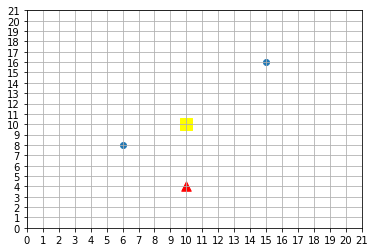

{0: None, 90: None, 180: None, 270: None}
0 (6, 8) NE N []
0


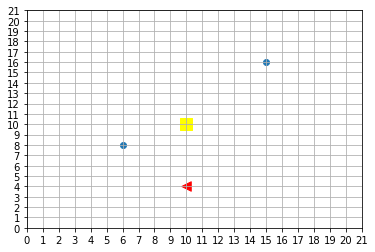

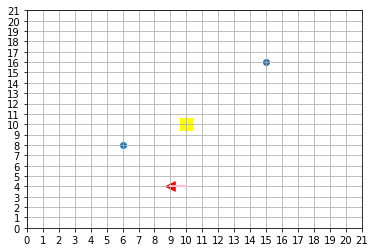

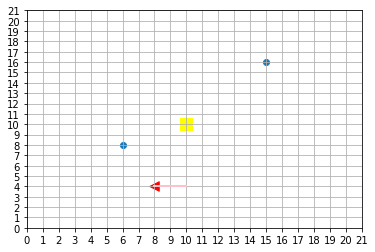

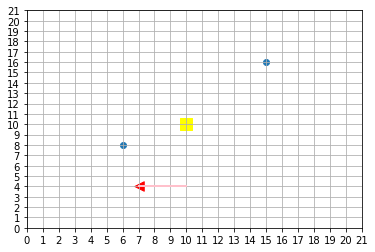

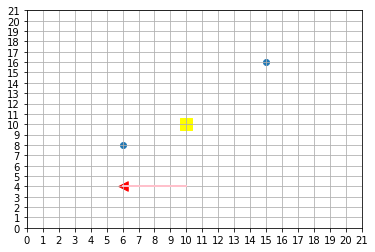

270


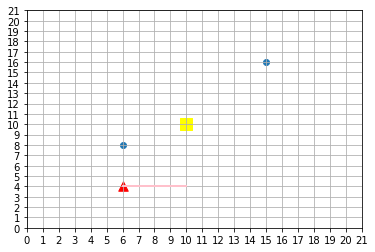

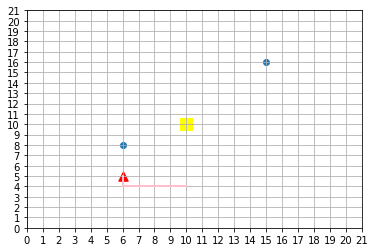

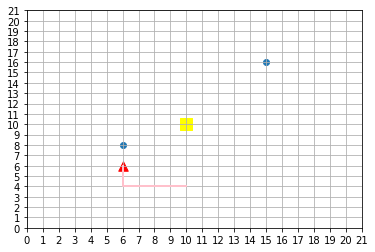

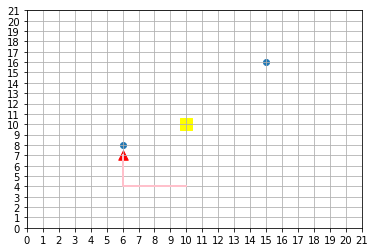

0
GGRGGGG


In [95]:
import random
import time
import math

import matplotlib.pyplot as plt



class Spychacz:
    def __init__(self,x,y,a):
        self.x = x
        self.y = y
        self.symbole = { 0: '^', 90: '>', 180: "v", 270: '<'}
        self.a = 0
        self.symbol = self.symbole[a]
        self.sx = [self.x]
        self.sy = [self.y]
        self.symbols_history = [self.symbol]
        
        
    def turn_right(self):
        self.a = (self.a + 90) % 360
        self.symbol = self.symbole[self.a]
        self.symbols_history.append(self.symbol)
    
    def turn_left(self):
        self.a = (self.a - 90) % 360
        self.symbol = self.symbole[self.a]
        self.symbols_history.append(self.symbol)
    
    def step_forward(self):
        if self.a == 0:
            self.y += 1
        if self.a == 90:
            self.x += 1
        if self.a == 180:
            self.y -= 1
        if self.a == 270:
            self.x -= 1
        self.sx.append(self.x)
        self.sy.append(self.y)
        
    def return_steps_history(self):
        return list(zip(self.sx, self.sy))
    
    def coordinates(self):
        return (self.x, self.y)
    
    def change_angle(self, a):
        self.a = a
        self.symbol = self.symbole[a]
        
    def calculate_path(self, p1, p2):
        x = p2[0] - p1[0]
        y = p2[1] - p1[1]
        point_angle = self.a
        print(point_angle)
        path = ''

        # angle 0     x = 0 and y > 0
        if x == 0 and y > 0:
            if point_angle == 0:
                path += ''.join(['G' for s in range(y)])
            elif point_angle == 90:
                path +=  'L' + ''.join(['G' for s in range(y)])
            elif point_angle == 180:
                path += 'RR' + ''.join(['G' for s in range(y)])
            elif point_angle == 270:
                path += 'R' + ''.join(['G' for s in range(y)])

        # angles 1 - 89      x > 0 and y > 0
        elif x > 0 and y > 0:
            if point_angle == 0:
                path += ''.join(['G' for s in range(y)]) + 'R' + ''.join(['G' for s in range(x)])
            elif point_angle == 90:
                path +=  ''.join(['G' for s in range(x)]) + 'L' + ''.join(['G' for s in range(y)])
            elif point_angle == 180:
                path += 'L' + ''.join(['G' for s in range(x)]) + 'L' + ''.join(['G' for s in range(y)])
            elif point_angle == 270:
                path += 'R' + ''.join(['G' for s in range(y)]) + 'R' + ''.join(['G' for s in range(x)])           

        # angle 90    y = 0 and x > 0
        elif y == 0 and x > 0:
            if point_angle == 0:
                path += 'R' + ''.join(['G' for s in range(x)])
            elif point_angle == 90:
                path +=  ''.join(['G' for s in range(x)])
            elif point_angle == 180:
                path += 'L' + ''.join(['G' for s in range(x)])
            elif point_angle == 270:
                path += 'LL' + ''.join(['G' for s in range(x)])

        # angles 91 - 179    x > 0 and y < 0
        elif x > 0 and y < 0:
            y *= -1
            if point_angle == 0:
                path += 'R' + ''.join(['G' for s in range(x)]) + 'R' + ''.join(['G' for s in range(y)])
            elif point_angle == 90:
                path += ''.join(['G' for s in range(x)]) + 'R' + ''.join(['G' for s in range(y)])
            elif point_angle == 180:
                path += ''.join(['G' for s in range(y)]) + 'L' + ''.join(['G' for s in range(x)])
            elif point_angle == 270:
                path += 'L' + ''.join(['G' for s in range(y)]) + 'L' + ''.join(['G' for s in range(x)])

        # angle 180   x = 0 and y < 0
        elif x == 0 and y < 0:
            y *= -1
            if point_angle == 0:
                path += 'RR' + ''.join(['G' for s in range(y)])
            elif point_angle == 90:
                path += 'R' + ''.join(['G' for s in range(y)])
            elif point_angle == 180:
                path += ''.join(['G' for s in range(y)])
            elif point_angle == 270:
                path += 'L' + ''.join(['G' for s in range(y)])

        # angles 181 - 269   x  < 0 and y < 0
        elif x  < 0 and y < 0:
            y *= -1
            x *= -1
            if point_angle == 0:
                path += 'L' + ''.join(['G' for s in range(x)]) + 'L' + ''.join(['G' for s in range(y)])
            elif point_angle == 90:
                path += 'R' + ''.join(['G' for s in range(y)]) + 'R' +   ''.join(['G' for s in range(x)])
            elif point_angle == 180:
                path += ''.join(['G' for s in range(y)]) + 'R' +   ''.join(['G' for s in range(x)])
            elif point_angle == 270:
                path += ''.join(['G' for s in range(x)]) + 'L' + ''.join(['G' for s in range(y)])

        # angle 270   y = 0 and x < 0 
        elif y == 0 and x < 0:
            x *= -1
            if point_angle == 0:
                path += 'L' + ''.join(['G' for s in range(x)])
            elif point_angle == 90:
                path +=  'LL' + ''.join(['G' for s in range(x)])
            elif point_angle == 180:
                path += 'R' + ''.join(['G' for s in range(x)])
            elif point_angle == 270:
                path += ''.join(['G' for s in range(x)])

        # angles 271 - 359   x < 0 and y > 0
        elif x < 0 and y > 0:
            x *= -1
            if point_angle == 0:
                path += ''.join(['G' for s in range(y)]) + 'L' + ''.join(['G' for s in range(x)])
            elif point_angle == 90:
                path += 'L' + ''.join(['G' for s in range(y)]) + 'L' + ''.join(['G' for s in range(x)])
            elif point_angle == 180:
                path += 'R' + ''.join(['G' for s in range(x)]) + 'R' + ''.join(['G' for s in range(y)])
            elif point_angle == 270:
                path += ''.join(['G' for s in range(x)]) + 'R' + ''.join(['G' for s in range(y)])
        return path
    
    def turn_right(self):
        self.a = (self.a + 90) % 360
        self.symbol = self.symbole[self.a]
        self.symbols_history.append(self.symbol)
    
    def turn_left(self):
        self.a = (self.a - 90) % 360
        self.symbol = self.symbole[self.a]
        self.symbols_history.append(self.symbol)
            
    def step_forward(self):
        if self.a == 0:
            self.y += 1
        if self.a == 90:
            self.x += 1
        if self.a == 180:
            self.y -= 1
        if self.a == 270:
            self.x -= 1
        self.sx.append(self.x)
        self.sy.append(self.y)
        
        
        
        
        
        

class Mapa:
    def __init__(self):
        self.number_of_balls = 2
        self.size_grid = 20
        self.container_x = int(self.size_grid/2)
        self.container_y = int(self.size_grid/2)
#         self.balls_x = [random.randrange(2, self.size_grid - 1) for x in range(self.number_of_balls)]
#         self.balls_y = [random.randrange(2, self.size_grid - 1) for y in range(self.number_of_balls)]
        self.balls_x = [6,15] # when found pop or remove 
        self.balls_y = [8,16] # when found pop or remove 
        
        self.balls_coordinates = self.get_balls_coordinates()
        self.spychacz = Spychacz(10,4,0)
        
        self.target_index = None
        
        self.draw_map()
        
    def move_spychacz(self, user_input):
        for e in user_input:
            if e.upper() == 'R':
                self.spychacz.turn_right()
            elif e.upper() == 'L':
                self.spychacz.turn_left()
            elif e.upper() == 'G':
                self.spychacz.step_forward()
            else:
                continue
            self.draw_map() 
            
        
      
    def get_balls_coordinates(self):
        return list(zip(self.balls_x, self.balls_y))
    
    def draw_map(self):
        plt.scatter(self.balls_x, self.balls_y)
        plt.scatter(self.container_x, self.container_y, color='yellow', s= 130, marker="s")
        plt.plot(self.spychacz.sx, self.spychacz.sy, color='pink', linewidth='2')
        plt.scatter(self.spychacz.x, self.spychacz.y, marker=self.spychacz.symbol, c='r', s= 90)
        plt.xticks(list(range(self.size_grid + 2)))
        plt.yticks(list(range(self.size_grid + 2)))
        plt.grid()
#         plt.pause(1)
        plt.show()

    
    def spychacz_closest_point(self):
        '''
        closest point to spychacz
        returns ID of a point
        '''
        minimum = self.size_grid * 100000
        x1, y1 = selfcontainer_x, self.container_x
        target_index = None
        for i, b in enumerate(self.get_balls_coordinates()):
            x2, y2 = b[0], b[1]
            distance = math.sqrt(((x2 -x1)**2) + ((y2 -y1)**2))
            if minimum > distance:
                minimum = distance
                target_index = i
        return target_index
                
    def container_closest_point(self):
        '''
        closest point to container
        assigns a ball ID to self.target_index
        and returns
        '''
        minimum = self.size_grid * 100000
        x1, y1 = self.spychacz.x, self.spychacz.y
        for i, b in enumerate(self.get_balls_coordinates()):
            x2, y2 = b[0], b[1]
            distance = math.sqrt(((x2 -x1)**2) + ((y2 -y1)**2))
            if minimum > distance:
                minimum = distance
                self.target_index = i
        return self.target_index
               
    
    def check_neighbors(self, point):
        '''
        takes coordinates
        checks which side is not free (sides) 0, 90, 180, 270 for a given point
        neighbors are given as 
        '''
        x,y = point[0], point[1]
        neighbors_id = {0: None, 90: None, 180: None, 270: None }
        for i in range(len(self.balls_x)):
            if x == self.balls_x[i] and y - 1 == self.balls_y[i]: neighbors_id[180] = i
            if x == self.balls_x[i] and y + 1 == self.balls_y[i]: neighbors_id[0] = i
            if y == self.balls_y[i] and x - 1 == self.balls_x[i]: neighbors_id[270] = i
            if y == self.balls_y[i] and x + 1 == self.balls_x[i]: neighbors_id[90] = i
        print(neighbors_id)
        return [ x for x in neighbors_id if neighbors_id[x] != None]
    
    def check_obstacles(self): #----------------
        pass 
    
    def check_directions(self, p1, p2):
        '''
        checks where is a poin2 for a given point1 N, NE, E, SE, S, SW, W, NW
        returns direction string and deduction of x or y ?????
        '''
        x, y = p2[0]-p1[0], p2[1]-p1[1]
        # angle 0        x = 0 and y > 0    N
        if x == 0 and y > 0:
            return 'N'
        # angles 1 - 89  x > 0 and y > 0    NE
        elif x > 0 and y > 0: 
            return 'NE'
        # angle 90    y = 0 and x > 0      E
        elif y == 0 and x > 0:
            return 'E'
        # angles 91 - 179 x > 0 and y < 0  SE
        elif x > 0 and y < 0:
            return 'SE'
        # angle 180   x = 0 and y < 0      S
        elif x == 0 and y < 0:
            return 'S'
        # angles 181 - 269 x  < 0 and y < 0 SW
        elif x  < 0 and y < 0:
            return 'SW'
        # angle 270   y = 0 and x < 0     W
        elif y == 0 and x < 0:
            return 'W'
        # angles 271 - 359 x < 0 and y > 0 NW
        elif x < 0 and y > 0:
            return 'NW'
    
    
        
    def target_ball(self):
        ball = self.container_closest_point() # index
        ball_coordinates = (self.balls_x[ball], self.balls_y[ball])
        
        direction_bc = self.check_directions(ball_coordinates , (self.container_x, self.container_y))
        direction_sc = self.check_directions((self.spychacz.x, self.spychacz.y) , (self.container_x, self.container_y))
        neighbors_ball = self.check_neighbors(ball_coordinates)
             
        print(ball, ball_coordinates, direction_bc, direction_sc, neighbors_ball)
        
        neighbors_ball = [270]
        
        move_spychacz_to = (self.spychacz.x, self.spychacz.y)
        if direction_bc == 'NE' and direction_sc in ['N','NE']:
            if 90 not in neighbors_ball and 270 not in neighbors_ball:
                move_spychacz_to = (self.balls_x[ball] -1, self.spychacz.y)
                path_string = self.spychacz.calculate_path((self.spychacz.x, self.spychacz.y), move_spychacz_to )
                self.move_spychacz(path_string)
                move_spychacz_to = (self.balls_x[ball] -1, self.balls_y[ball])
                path_string = self.spychacz.calculate_path((self.spychacz.x, self.spychacz.y), move_spychacz_to )
                self.move_spychacz(path_string + 'R')
            elif 0 not in neighbors_ball and 180 not in neighbors_ball:
                path_string = self.spychacz.calculate_path((self.spychacz.x, self.spychacz.y),  (self.balls_x[ball] , self.spychacz.y))
                self.move_spychacz(path_string)
                path_string = self.spychacz.calculate_path((self.spychacz.x, self.spychacz.y),  (self.balls_x[ball] , self.balls_y[ball] - 1))
                self.move_spychacz(path_string)
                
                
        
        direction_bc = self.check_directions(ball_coordinates , (self.container_x, self.container_y))
        path_string = self.spychacz.calculate_path(ball_coordinates,  (self.container_x, self.container_y))
        print(path_string)

mapa = Mapa()
mapa.container_closest_point()
mapa.target_ball()

In [89]:
import random


'''
works on coordinates 
but point 0,0 is located in the left up corner
'''

def get_obstacles_coordinates(maze):
    obstacles_coordinates = list()
    for i, row in enumerate(maze):
        y = i
        for n, j in enumerate(list(row)):
            if j =='#':
                x = n
                obstacles_coordinates.append((x,y))
    return obstacles_coordinates

def add_random_rock(row):
    rock_num = int(len(row)/2) # defines number of rocks per row
    len_row = len(row)

    for rock in range(rock_num):
        p = random.randint(0, len_row -1)
        row = row[:p] + "#" + row[p + 1:]
    return row


def create_dangon(width,height):
    maze = []
    maze_nodes = []
    for h in range(height):
        row = ""
        row_nodes = []
        for x in range(width):
            row += " "
            row_nodes.append([h,x])

        row = add_random_rock(row)
        maze.append(row)
        maze_nodes.append(row_nodes)
    return maze, maze_nodes


def add_start_end(x, width, height, maze):
    while True:
        horizontal = random.randint(0,width - 1)
        vertical = random.randint(0, height - 1)
        if maze[vertical][horizontal] not in ["S", "E"]:
            place = [vertical, horizontal]
            # adds start and end to maze
            maze[vertical] = maze[vertical][:horizontal] + x + maze[vertical][horizontal + 1:]

            return place, maze


def add_path_to_maze(direction,shortes_path_nodes,maze):
    if direction != "Not Found":
        shortes_path_nodes.pop(0)
        shortes_path_nodes = list(shortes_path_nodes[:-1])
        for node in shortes_path_nodes:
            vertical = node[0]
            horizontal = node[1]
            maze[vertical] = maze[vertical][:horizontal] + "X" + maze[vertical][horizontal + 1:]

        for row in maze:
            print(list(row))
        
        
def find_neighbours(next_node, width, height, obstacles_coordinates):
    neighbours_nodes = []
    neighbours = []

    for i in ["left", "right", "up", "down"]:
        if next_node[1] - 1 >= 0:
            left = [next_node[0], next_node[1] - 1]
            if left not in obstacles_coordinates:
                neighbours.append("L")
                neighbours_nodes.append(left)
        if next_node[1] + 1 < width:
            right = [next_node[0], next_node[1] + 1]
            if right not in obstacles_coordinates:
                neighbours.append("R")
                neighbours_nodes.append(right)
        if next_node[0] + 1 < height:
            down = [next_node[0] + 1, next_node[1]]
            if down not in obstacles_coordinates:
                neighbours.append("D")
                neighbours_nodes.append(down)
        if next_node[0] - 1 >= 0:
            up = [next_node[0] - 1, next_node[1]]
            if up not in obstacles_coordinates:
                neighbours.append("U")
                neighbours_nodes.append(up)

        return neighbours_nodes, neighbours
        

def main(start_node,end_node, obstacles_coordinates):
    visited = []
    queue_nodes = [[start_node]]
    queue_direcion = [[""]]

    while queue_nodes:
        current_way = queue_nodes.pop(0)
        next_node = current_way[-1]

        current_way_str = queue_direcion.pop(0)

        if next_node not in visited:
            neighbours_nodes, neighbours = find_neighbours(next_node, width, height, obstacles_coordinates)
            for index, neighbour in enumerate(neighbours_nodes):
                new_way = list(current_way)
                new_way.append(neighbour)
                new_way_str = list(current_way_str)
                new_way_str.append(neighbours[index])
                queue_nodes.append(new_way)
                queue_direcion.append(new_way_str)

                if neighbour == end_node:
                    new_way_str.pop(0)
                    direction = "".join(new_way_str)
                    return new_way, direction
        visited.append(next_node)

    return "There is no path connecting start and end", "Not Found"
        
        
# maze_nodes = maze_nodes[::-1]
# maze = maze[::-1]

width, height = 5, 5
maze, maze_nodes = create_dangon(width,height)
obstacles_coordinates = get_obstacles_coordinates(maze)
start_node,maze = add_start_end("S",width, height, maze)
end_node,maze = add_start_end("E",width, height, maze)

print ('get_obstacles_coordinates', obstacles_coordinates)

print(start_node, end_node)
for row in maze:
    print(list(row))
    
shortes_path_nodes, direction = main(start_node,end_node, obstacles_coordinates)

print("Direction: ",direction)
print()

add_path_to_maze(direction,shortes_path_nodes,maze)
print(shortes_path_nodes)

for x in maze_nodes:
    print(x)

get_obstacles_coordinates [(0, 0), (0, 1), (2, 1), (3, 2), (2, 3), (3, 3), (1, 4), (4, 4)]
[4, 1] [0, 3]
['#', ' ', ' ', 'E', ' ']
['#', ' ', '#', ' ', ' ']
[' ', ' ', ' ', '#', ' ']
[' ', ' ', '#', '#', ' ']
[' ', 'S', ' ', ' ', '#']
Direction:  RRUUUU

['#', ' ', ' ', 'E', ' ']
['#', ' ', '#', 'X', ' ']
[' ', ' ', ' ', 'X', ' ']
[' ', ' ', '#', 'X', ' ']
[' ', 'S', 'X', 'X', '#']
[[4, 2], [4, 3], [3, 3], [2, 3], [1, 3], [0, 3]]
[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4]]
[[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]]
[[2, 0], [2, 1], [2, 2], [2, 3], [2, 4]]
[[3, 0], [3, 1], [3, 2], [3, 3], [3, 4]]
[[4, 0], [4, 1], [4, 2], [4, 3], [4, 4]]


In [96]:
import random


'''
works on coordinates 
but point 0,0 is located in the left up corner
'''

def get_obstacles_coordinates(maze):
    obstacles_coordinates = list()
    for i, row in enumerate(maze):
        y = i
        for n, j in enumerate(list(row)):
            if j =='#':
                x = n
                obstacles_coordinates.append((x,y))
    return obstacles_coordinates

def add_random_rock(row):
    rock_num = int(len(row)/2) # defines number of rocks per row
    len_row = len(row)

    for rock in range(rock_num):
        p = random.randint(0, len_row -1)
        row = row[:p] + "#" + row[p + 1:]
    return row


def create_dangon(width,height):
    maze = []
    maze_nodes = []
    for h in range(height):
        row = ""
        row_nodes = []
        for x in range(width):
            row += " "
            row_nodes.append([h,x])

        row = add_random_rock(row)
        maze.append(row)
        maze_nodes.append(row_nodes)
    return maze, maze_nodes


def add_start_end(x, width, height, maze):
    while True:
        horizontal = random.randint(0,width - 1)
        vertical = random.randint(0, height - 1)
        if maze[vertical][horizontal] not in ["S", "E"]:
            place = [vertical, horizontal]
            # adds start and end to maze
            maze[vertical] = maze[vertical][:horizontal] + x + maze[vertical][horizontal + 1:]

            return place, maze


def add_path_to_maze(direction,shortes_path_nodes,maze):
    if direction != "Not Found":
        shortes_path_nodes.pop(0)
        shortes_path_nodes = list(shortes_path_nodes[:-1])
        for node in shortes_path_nodes:
            vertical = node[0]
            horizontal = node[1]
            maze[vertical] = maze[vertical][:horizontal] + "X" + maze[vertical][horizontal + 1:]

        for row in maze:
            print(list(row))
        
        
def find_neighbours(next_node, width, height, obstacles_coordinates):
    neighbours_nodes = []
    neighbours = []

    for i in ["left", "right", "up", "down"]:
        if next_node[1] - 1 >= 0:
            left = [next_node[0], next_node[1] - 1]
            if left not in obstacles_coordinates:
                neighbours.append("L")
                neighbours_nodes.append(left)
        if next_node[1] + 1 < width:
            right = [next_node[0], next_node[1] + 1]
            if right not in obstacles_coordinates:
                neighbours.append("R")
                neighbours_nodes.append(right)
        if next_node[0] + 1 < height:
            down = [next_node[0] + 1, next_node[1]]
            if down not in obstacles_coordinates:
                neighbours.append("D")
                neighbours_nodes.append(down)
        if next_node[0] - 1 >= 0:
            up = [next_node[0] - 1, next_node[1]]
            if up not in obstacles_coordinates:
                neighbours.append("U")
                neighbours_nodes.append(up)

        return neighbours_nodes, neighbours
        

def main(start_node,end_node, obstacles_coordinates):
    visited = []
    queue_nodes = [[start_node]]
    queue_direcion = [[""]]

    while queue_nodes:
        current_way = queue_nodes.pop(0)
        next_node = current_way[-1]

        current_way_str = queue_direcion.pop(0)

        if next_node not in visited:
            neighbours_nodes, neighbours = find_neighbours(next_node, width, height, obstacles_coordinates)
            for index, neighbour in enumerate(neighbours_nodes):
                new_way = list(current_way)
                new_way.append(neighbour)
                new_way_str = list(current_way_str)
                new_way_str.append(neighbours[index])
                queue_nodes.append(new_way)
                queue_direcion.append(new_way_str)

                if neighbour == end_node:
                    new_way_str.pop(0)
                    direction = "".join(new_way_str)
                    return new_way, direction
        visited.append(next_node)

    return "There is no path connecting start and end", "Not Found"
        
        
# maze_nodes = maze_nodes[::-1]
# maze = maze[::-1]

width, height = 5, 5
maze, maze_nodes = create_dangon(width,height)
maze_nodes = maze_nodes[::-1]
maze = maze[::-1]
obstacles_coordinates = get_obstacles_coordinates(maze)
start_node,maze = add_start_end("S",width, height, maze)
end_node,maze = add_start_end("E",width, height, maze)

print ('get_obstacles_coordinates', obstacles_coordinates)

print(start_node, end_node)
for row in maze:
    print(list(row))
    
shortes_path_nodes, direction = main(start_node,end_node, obstacles_coordinates)

print("Direction: ",direction)
print()

add_path_to_maze(direction,shortes_path_nodes,maze)
print(shortes_path_nodes)

for x in maze_nodes:
    print(x)

get_obstacles_coordinates [(1, 0), (3, 0), (3, 1), (0, 2), (4, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
[4, 2] [3, 1]
[' ', '#', ' ', '#', ' ']
[' ', ' ', ' ', '#', ' ']
['#', ' ', ' ', ' ', '#']
[' ', 'E', '#', ' ', ' ']
[' ', ' ', 'S', '#', ' ']
Direction:  LU

[' ', '#', ' ', '#', ' ']
[' ', ' ', ' ', '#', ' ']
['#', ' ', ' ', ' ', '#']
[' ', 'E', '#', ' ', ' ']
[' ', 'X', 'S', '#', ' ']
[[4, 1], [3, 1]]
[[4, 0], [4, 1], [4, 2], [4, 3], [4, 4]]
[[3, 0], [3, 1], [3, 2], [3, 3], [3, 4]]
[[2, 0], [2, 1], [2, 2], [2, 3], [2, 4]]
[[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]]
[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4]]


In [93]:
l = [[4, 3], [4, 2], [4, 1], [4, 0], [3, 0]]
nl = list()
for i in l:
    x,y = i[1], i[0]
    nl.append((x,y))
nl    

[(3, 4), (2, 4), (1, 4), (0, 4), (0, 3)]

In [94]:
[ (i[1], i[0]) for i in l]

[(3, 4), (2, 4), (1, 4), (0, 4), (0, 3)]

In [97]:
shortes_path_nodes, direction = main([4, 0],[0, 4], [(1, 0), (3, 0), (3, 1), (0, 2), (4, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

print("Direction: ",direction)

Direction:  RRRRUUUU
